In [1]:
# Pode ser necessário caso não esteja configurado link no ambiente atual 
# ou não consiga ativar um virtualenv com ajna_commons instalado
import os
import sys
sys.path.insert(0, os.path.join('..', '..', '..', '..', 'commons'))

In [2]:
import io
import os
import IPython.display as display
from bson import ObjectId
from PIL import Image
from pymongo import MongoClient
from gridfs import GridFS
from ajna_commons.utils.images import get_imagens_recortadas
from ajna_commons.flask.conf import DATABASE, MONGODB_URI
from ajna_commons.utils.images import get_cursor

db = MongoClient(host=MONGODB_URI)[DATABASE]
fs = GridFS(db)

2019-05-17 11:27:57,861 ajna         INFO     Configuração de log efetuada


Fazendo log de erros e alertas no arquivo  ../../../../commons/ajna_commons/flask/error.log
Fazendo log de atividade no arquivo  ../../../../commons/ajna_commons/flask/access.log


In [7]:
import datetime
filtro = {'metadata.dataescaneamento': 
          {'$lte': datetime.datetime(2019, 5, 17, 23, 59, 59, 999999),
           '$gte': datetime.datetime(2017, 1, 1, 0, 0)},
          'metadata.contentType': 'image/jpeg', 'metadata.alertapeso': True}
projection = {'filename': 1, '_id': 1, 'metadata.dataescaneamento': 1, 
              'metadata.predictions.bbox': 1, 'metadata.numeroinformado': 1,
              'metadata.diferencapeso': 1}
order = [["metadata.diferencapeso", -1]]
PAGE_ROWS = 3
skip = 0
PAGES = 100
for grid_data in db['fs.files'] \
        .find(filter=filtro, projection=projection) \
        .sort(order) \
        .limit(PAGE_ROWS).skip(skip):
    print(grid_data)


{'_id': ObjectId('5c530b351004b377f3dc132f'), 'filename': '20170728002614002US_stamp.jpg', 'metadata': {'dataescaneamento': datetime.datetime(2017, 7, 28, 15, 11, 25, 67000), 'predictions': [{'bbox': [25, 107, 195, 337]}], 'diferencapeso': 348859.30362676765, 'numeroinformado': 'BLKU2582140'}}
{'_id': ObjectId('5c530cc71004b377f3dc8c01'), 'filename': '201707270026210036S_stamp.jpg', 'metadata': {'dataescaneamento': datetime.datetime(2017, 7, 27, 10, 42, 38, 473000), 'predictions': [{'bbox': [34, 268, 149, 531]}, {'bbox': [23, 145, 142, 522]}], 'diferencapeso': 32379.4902, 'numeroinformado': 'PRXU0068167'}}
{'_id': ObjectId('5c530ba21004b377f3dc3746'), 'filename': '20170724002614007US_stamp.jpg', 'metadata': {'dataescaneamento': datetime.datetime(2017, 7, 24, 21, 22, 37, 297000), 'predictions': [{'bbox': [135, 6, 400, 64]}], 'diferencapeso': 30005.136955579987, 'numeroinformado': 'CGMU4998420'}}


In [6]:
TEMNCM = {'metadata.contentType': 'image/jpeg',
          'metadata.carga.ncm': {'$exists': True}}
cursor = get_cursor(db, filtro=TEMNCM, limit=10)

In [ ]:
row = next(cursor)
imgs = get_imagens_recortadas(db, row['_id'])
print(imgs)

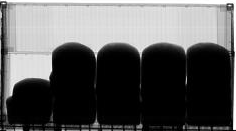

In [12]:
pil_image = imgs[0]
display.display(pil_image)

In [13]:
grid_out = fs.get(row['_id'])
raw = grid_out.read()
raw

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00.Intel(R) JPEG Library, version [1.51.12.44]\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc4\x01\xa2\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\x

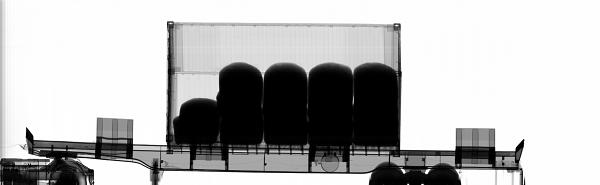

In [14]:
display.Image(raw)

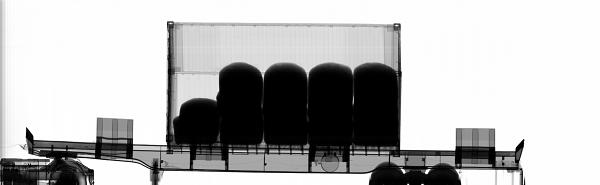

In [15]:
pil_image = Image.open(io.BytesIO(raw))
display.display(pil_image)

In [18]:
print(row['metadata']['carga'])

{'ncm': [{'_id': ObjectId('5c5349a21004b33a16436a8f'), 'ncm': '2818', 'conhecimento': '151707130574300', 'item': '0001', 'descricao': 'corindo artificial, de constituicao quimica definida ou nao; oxido de aluminio; hidroxido de aluminio.'}, {'_id': ObjectId('5c5349a21004b33a16436a90'), 'ncm': '2818', 'conhecimento': '151707130574300', 'item': '0002', 'descricao': 'corindo artificial, de constituicao quimica definida ou nao; oxido de aluminio; hidroxido de aluminio.'}, {'_id': ObjectId('5c5349a21004b33a16436a91'), 'ncm': '2818', 'conhecimento': '151707130574300', 'item': '0003', 'descricao': 'corindo artificial, de constituicao quimica definida ou nao; oxido de aluminio; hidroxido de aluminio.'}, {'_id': ObjectId('5c5349a21004b33a16436a92'), 'ncm': '2818', 'conhecimento': '151707130574300', 'item': '0004', 'descricao': 'corindo artificial, de constituicao quimica definida ou nao; oxido de aluminio; hidroxido de aluminio.'}, {'_id': ObjectId('5c5349a21004b33a16436a93'), 'ncm': '2818', 'c

In [19]:
print(row)

{'md5': '38210a27de90c96f0015bdc7397d6eb8', 'chunkSize': 261120, 'uploadDate': datetime.datetime(2019, 1, 31, 14, 41, 44, 877000), '_id': ObjectId('5c5309281004b3779c37d3a2'), 'filename': '201707010026140001S_stamp.jpg', 'length': 12030, 'metadata': {'idcov': '447', 'predictions': [{'bbox': [20, 167, 151, 403], 'pesoteste': 28337.480494505493, 'vazio2': 1.0, 'vazioteste': 1.0, 'vazio': False, 'vazioteste2': False, 'peso': 28337.480494505493, 'class': 2, 'index': [0.0, 1.2464443445205688, 0.0, 0.8246548771858215, 0.0, 0.0, 0.0, 0.38457348942756653, 0.0, 1.0052496194839478, 0.0, 0.1068667620420456, 0.07894809544086456, 0.0, 0.0, 0.2448502480983734, 0.0, 1.016670823097229, 0.0, 0.1663249433040619, 0.1495649218559265, 0.0, 0.0, 0.18852409720420837, 0.0, 1.4383600950241089, 0.09631088376045227, 0.1597435623407364, 0.7316836714744568, 0.0, 0.15341518819332123, 0.18055927753448486, 0.0, 1.6475549936294556, 0.0, 0.9959424734115601, 0.9046587347984314, 0.0, 0.0, 0.3053806722164154, 0.1578250378